In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# # read csv (google collab)
# from google.colab import drive
# drive.mount('/content/gdrive')

In [3]:
# read csv (google collab)
# data_url = "/content/gdrive/MyDrive/UNI/Big Data Problem/Manhattan12.csv"
# df = pd.read_csv(data_url, header = 4)
# df.shape

In [4]:
# read csv (vs code/ python notebook)
# header is defined so that text at top of csv is skipped
df = pd.read_csv('Manhattan12.csv', header = 4)
df.shape

(27395, 21)

In [5]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,...,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013


## Part 1


Preparing data (using aggressive approach)

In [6]:
df = df.rename(columns={'SALE\nPRICE':'SALE PRICE', 'APART\nMENT\nNUMBER':'APARTMENT NUMBER'}) #rename columns

In [7]:
def price_to_int(column):
    df[column] = df[column].str.replace(',','', regex=True).str.replace('$','', regex=True).astype('int')
    
price_to_int('SALE PRICE')
price_to_int('LAND SQUARE FEET')
price_to_int('GROSS SQUARE FEET')
price_to_int('TOTAL UNITS')
price_to_int('RESIDENTIAL UNITS')

In [8]:
# list all numerical variables 
df_nums = df.select_dtypes(include=[np.number])
list(df_nums)

['BOROUGH',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'SALE PRICE']

In [9]:
# convert sale date to datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], dayfirst=True)

In [10]:
def replace(df, val):
    df.replace(val, np.nan, inplace=True) 

# replace 0 with NaN
replace(df, 0)
replace(df, '0')

pd.isnull(df).sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              1
RESIDENTIAL UNITS                 16372
COMMERCIAL UNITS                  23962
TOTAL UNITS                        9704
LAND SQUARE FEET                  22906
GROSS SQUARE FEET                 23069
YEAR BUILT                         6441
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64

In [11]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,27395.0,27395.000000,27395.000000,27394.000000,11023.000000,3433.000000,17691.000000,4489.000000,4.326000e+03,20954.000000,27395.000000,1.980200e+04
mean,1.0,1109.666728,741.789086,10029.226217,4.390003,2.992426,3.545249,5893.466028,6.061620e+04,1953.080557,2.488118,2.556609e+06
std,0.0,465.994469,819.422424,34.966983,23.260831,12.689861,19.482767,7884.729624,8.111694e+04,37.692641,0.891723,1.916295e+07
min,1.0,7.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,200.000000,2.530000e+02,1000.000000,1.000000,1.000000e+00
25%,1.0,877.000000,37.000000,10016.000000,1.000000,1.000000,1.000000,2104.000000,6.198500e+03,1920.000000,2.000000,3.676662e+05
50%,1.0,1047.000000,1007.000000,10019.000000,1.000000,2.000000,1.000000,5046.000000,2.337150e+04,1955.000000,2.000000,7.400000e+05
75%,1.0,1411.000000,1233.000000,10027.000000,1.000000,2.000000,1.000000,7532.000000,1.128500e+05,1987.000000,4.000000,1.627399e+06
max,1.0,2250.000000,9117.000000,10463.000000,1328.000000,604.000000,1349.000000,213650.000000,1.970736e+06,2013.000000,4.000000,1.307965e+09


In [12]:
df = df.drop(columns=['BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER'])

In [13]:
# finding out how many dupliactes there are by subtracting duplicates from 'drop duplicates' from entire dataframe
len(df)-len(df.drop_duplicates())

1593

In [14]:
df.drop_duplicates(keep=False, inplace=True)

df.shape

(25072, 18)

In [15]:
# dropping null values
df = df.dropna()

In [16]:
def boxplot(column):
    sns.boxplot(x=df[column])
    plt.show()

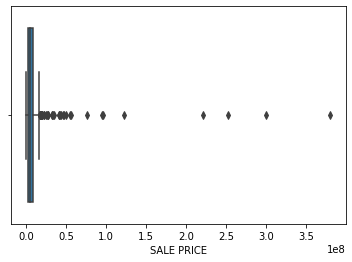

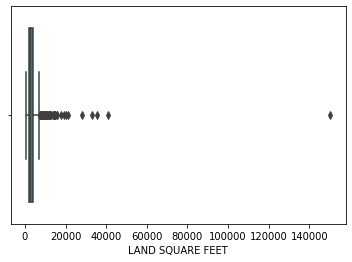

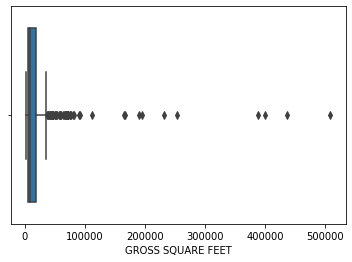

In [17]:
# identifying outliers
boxplot('SALE PRICE')
boxplot('LAND SQUARE FEET')
boxplot('GROSS SQUARE FEET')

<AxesSubplot:xlabel='YEAR BUILT', ylabel='Count'>

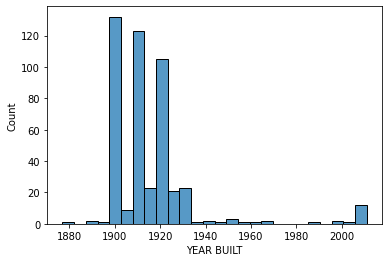

In [18]:
# this is to check that there are any years that seem odd, everything looks realistic so no cleaning required
sns.histplot(data=df, x='YEAR BUILT')

In [19]:
# removing ouliers by getting everything below 0.05 quantile and above 0.95
def remove_outliers(df, column):
    q_low = df[column].quantile(0.05)
    q_hi  = df[column].quantile(0.95)

    df = df[(df[column] < q_hi) & (df[column] > q_low)]

    return df

In [20]:
df = remove_outliers(df, 'SALE PRICE')
df = remove_outliers(df, 'LAND SQUARE FEET')
df = remove_outliers(df, 'GROSS SQUARE FEET')

In [21]:
df.shape

(339, 18)

Skew of Raw data: 1.434584
Kurt of Raw data: 1.944531


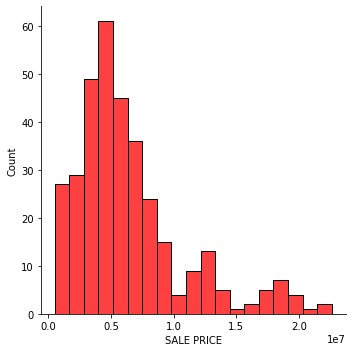

In [22]:
sns.displot(df['SALE PRICE'], color ="r") #Shows the distribution of sale price

print("Skew of Raw data: %f" % df['SALE PRICE'].skew())
print("Kurt of Raw data: %f" % df['SALE PRICE'].kurt())

Skew after 1st Log Transformation: -0.586058
Kurt after 1st Log Transformation: 0.743628


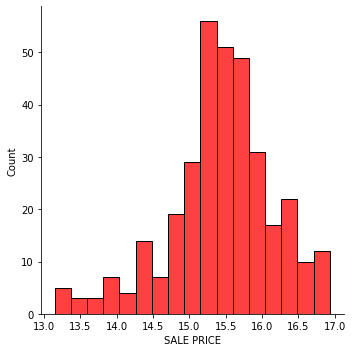

In [23]:
# Reduction of Skewness by taking Logrithm of Variable
SingleLog_y = np.log(df['SALE PRICE']) # Log transformation of the target variable
sns.displot(SingleLog_y, color ="r")

print("Skew after 1st Log Transformation: %f" % SingleLog_y.skew())
print("Kurt after 1st Log Transformation: %f" % SingleLog_y.kurt())

In [24]:
# log of sale prices
df['LN SALE PRICE'] = np.log(df['SALE PRICE'])

In [27]:
# list all categorical values
df_cat = df.select_dtypes(include=[object])
list(df_cat)

# adding year built to list of categorical columns
df_cat['YEAR BUILT'] = df['YEAR BUILT']

# looping through all categorial data
for i in df_cat: #Convert the categorical list to category type instead of object.
  df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 26 to 27067
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    339 non-null    category      
 1   BUILDING CLASS CATEGORY         339 non-null    category      
 2   TAX CLASS AT PRESENT            339 non-null    category      
 3   BLOCK                           339 non-null    int64         
 4   LOT                             339 non-null    int64         
 5   BUILDING CLASS AT PRESENT       339 non-null    category      
 6   ADDRESS                         339 non-null    category      
 7   ZIP CODE                        339 non-null    float64       
 8   RESIDENTIAL UNITS               339 non-null    float64       
 9   COMMERCIAL UNITS                339 non-null    float64       
 10  TOTAL UNITS                     339 non-null    float64       
 11  LAN

In [28]:
# label encoding (turning columns containing strings such as 'NEIGHBORHOOD' into data that can be used in prediction model)

# looping through and creating new columns so that original data is still in dataframe
for x in df_cat: #Creates a new category column in the dataframe
  df[x + "_CAT"] = df[x].cat.codes

In [29]:
def normalise(df):
    num_cols=df.select_dtypes(include=[np.number]).copy()
    df_norm=((num_cols-num_cols.min())/(num_cols.max()-num_cols.min()))
    return df_norm

df_norm=normalise(df)

In [30]:
df_norm.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE PRICE,LN SALE PRICE,NEIGHBORHOOD_CAT,BUILDING CLASS CATEGORY_CAT,TAX CLASS AT PRESENT_CAT,BUILDING CLASS AT PRESENT_CAT,ADDRESS_CAT,BUILDING CLASS AT TIME OF SALE_CAT,YEAR BUILT_CAT
26,0.173952,0.063492,0.017316,0.533333,0.111111,0.565217,0.413839,0.564001,0.333333,0.573118,0.857428,0.0,0.25,0.25,0.20,0.172205,0.20,0.666667
30,0.174403,0.103175,0.017316,0.777778,0.222222,0.826087,0.561303,0.543049,0.333333,0.149141,0.529639,0.0,0.25,0.25,0.20,0.299094,0.20,0.148148
31,0.175304,0.109127,0.017316,0.200000,0.000000,0.195652,0.217333,0.134386,0.333333,0.308453,0.702504,0.0,0.25,0.75,0.12,0.392749,0.12,0.148148
32,0.175304,0.111111,0.017316,0.177778,0.000000,0.173913,0.217333,0.130563,0.333333,0.308453,0.702504,0.0,0.25,0.75,0.12,0.377644,0.12,0.148148
33,0.175304,0.113095,0.017316,0.177778,0.000000,0.195652,0.217333,0.139547,0.333333,0.308453,0.702504,0.0,0.25,0.75,0.12,0.359517,0.12,0.148148


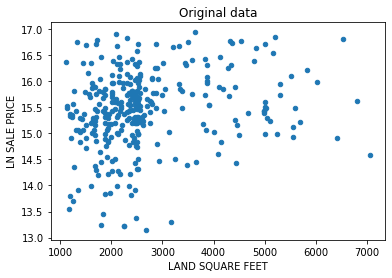

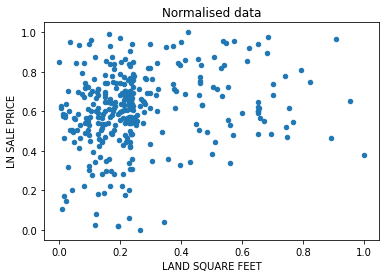

In [31]:
def scatter_plot(df, x, y, title):
    df.plot.scatter(x=x, y=y, title=title)
    plt.show()

# show comparison of scales between original and normalised data
scatter_plot(df, 'LAND SQUARE FEET', 'LN SALE PRICE', 'Original data')
scatter_plot(df_norm, 'LAND SQUARE FEET', 'LN SALE PRICE', 'Normalised data')

In [32]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,SALE PRICE,SALE DATE,LN SALE PRICE,NEIGHBORHOOD_CAT,BUILDING CLASS CATEGORY_CAT,TAX CLASS AT PRESENT_CAT,BUILDING CLASS AT PRESENT_CAT,ADDRESS_CAT,BUILDING CLASS AT TIME OF SALE_CAT,YEAR BUILT_CAT
26,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,397,33,C7,14 AVENUE B,10009.0,25.0,2.0,...,13185684.0,2013-01-31,16.394642,0,2,1,5,57,5,18
30,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,53,C7,170 EAST 2ND STREET,10009.0,36.0,3.0,...,3810602.0,2012-10-26,15.153298,0,2,1,5,99,5,4
31,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,56,C4,203 EAST 4TH STREET,10009.0,10.0,1.0,...,7333333.0,2013-04-09,15.807941,0,2,3,3,130,3,4
32,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,57,C4,201 EAST 4TH STREET,10009.0,9.0,1.0,...,7333333.0,2013-04-09,15.807941,0,2,3,3,125,3,4
33,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,58,C4,199 EAST 4TH STREET,10009.0,9.0,1.0,...,7333333.0,2013-04-09,15.807941,0,2,3,3,119,3,4


Data Exploration

In [33]:
def line_plot(df, x):
    sns.lineplot(data=df, x=x, y='SALE PRICE')
    plt.show()

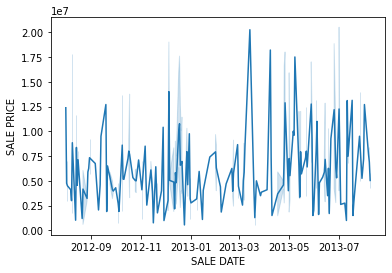

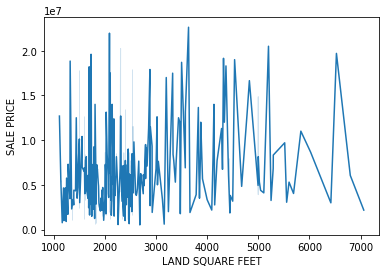

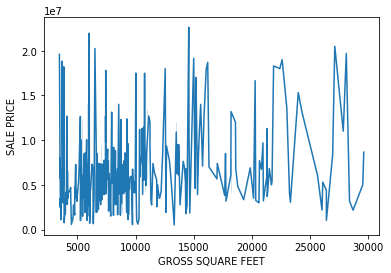

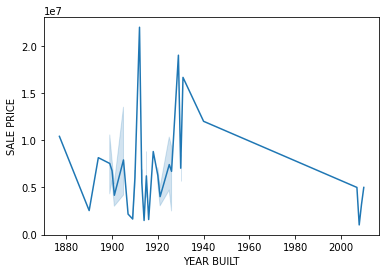

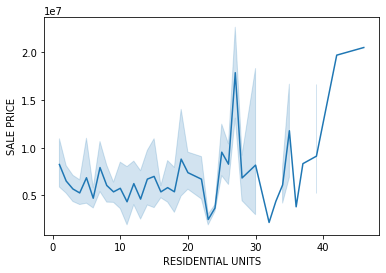

In [34]:
line_plot(df, 'SALE DATE')
line_plot(df, 'LAND SQUARE FEET')
line_plot(df, 'GROSS SQUARE FEET')
line_plot(df, 'YEAR BUILT')
line_plot(df, 'RESIDENTIAL UNITS')

In [35]:
def bar_plot(df, x):
    plt.figure(figsize=(40,10))
    sns.barplot(data=df, x=x, y='SALE PRICE')
    plt.show()

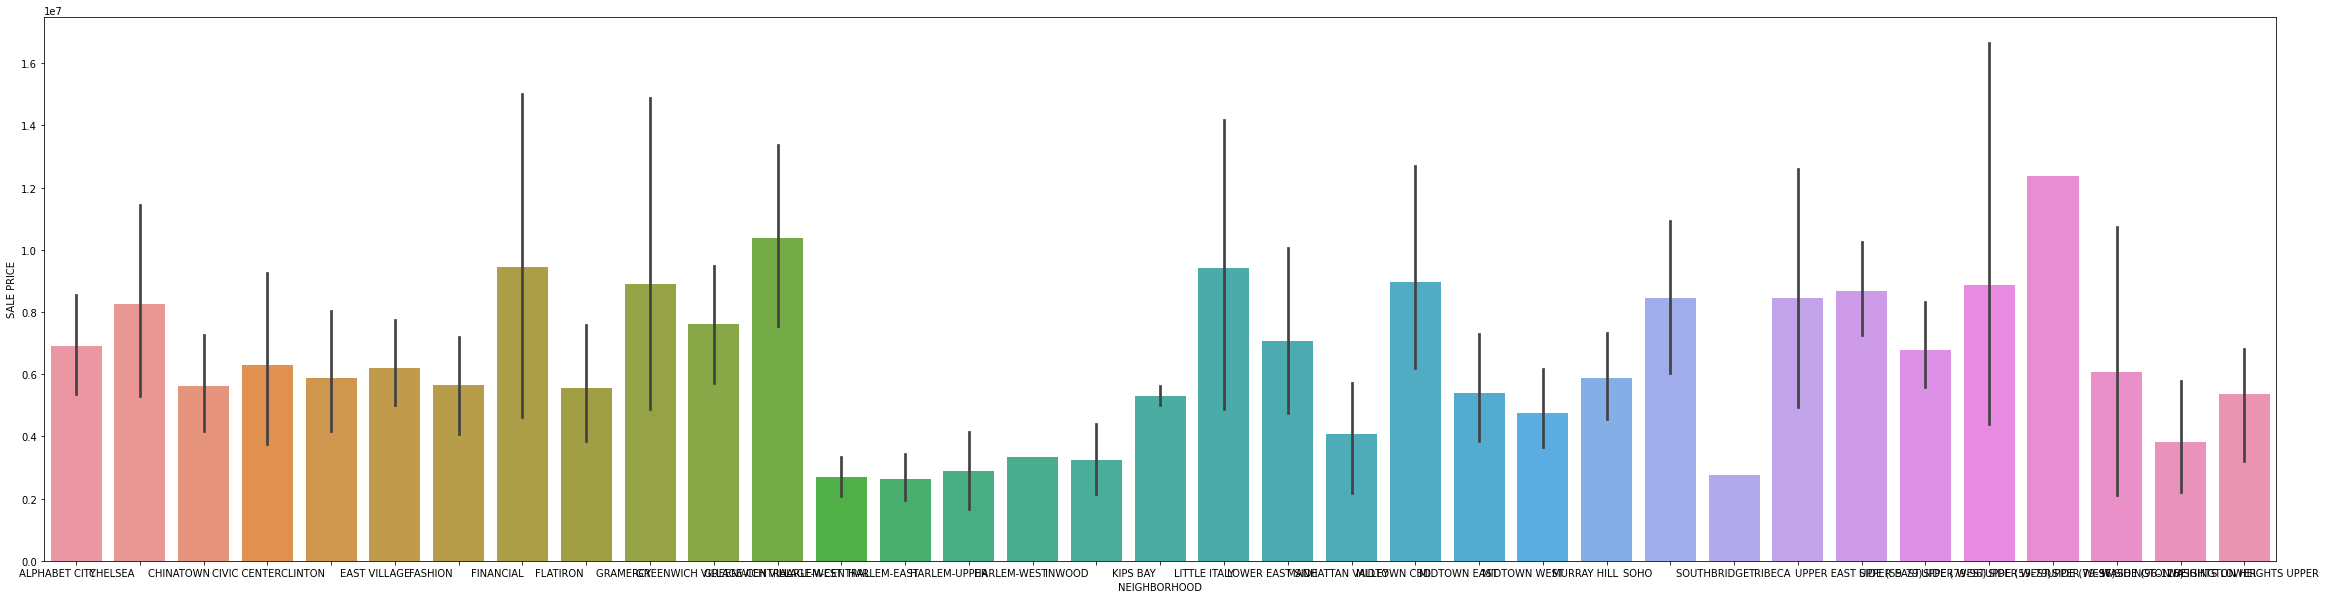

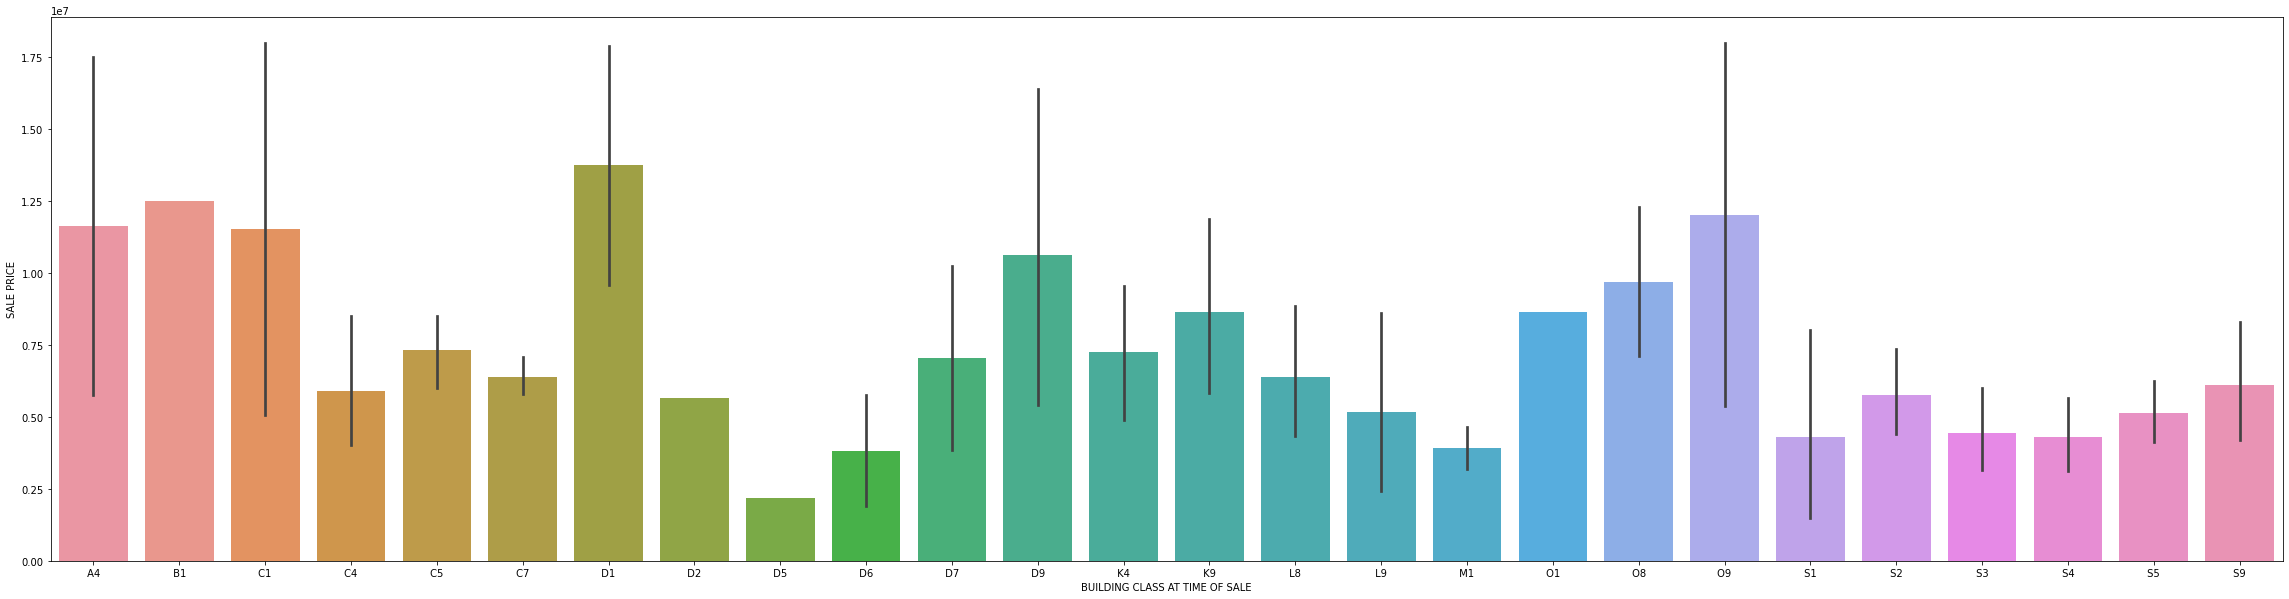

In [36]:
bar_plot(df, 'NEIGHBORHOOD')
# there does seem to be a correlation between class of building and price (i.e D1 seems to sell for a lot) but not enough information in glossary about codes (like D1) to infer anything 
bar_plot(df, 'BUILDING CLASS AT TIME OF SALE')

<AxesSubplot:xlabel='SALE DATE', ylabel='SALE PRICE'>

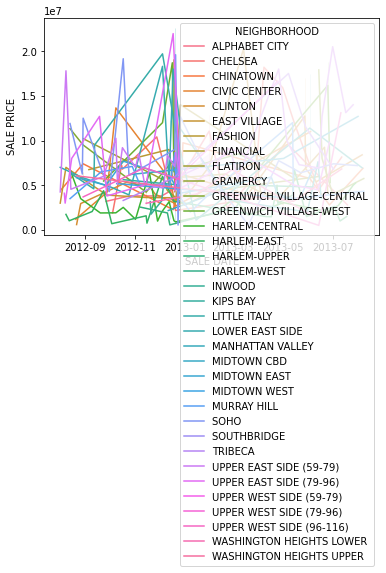

In [37]:
sns.lineplot(data=df, x='SALE DATE', y='SALE PRICE', hue='NEIGHBORHOOD')

In [38]:
# line plot above is very messy and unreadable so different line graphs will be created for each neighbourhood
neighbourhoods = df['NEIGHBORHOOD'].unique()

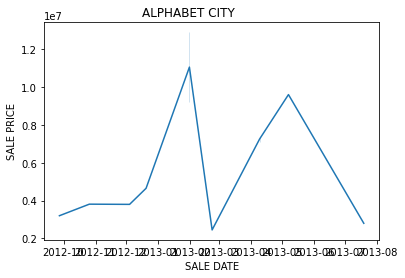

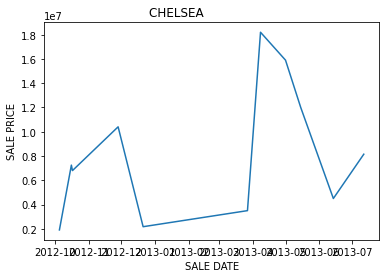

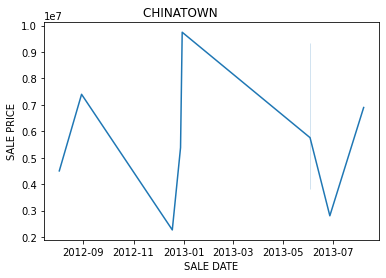

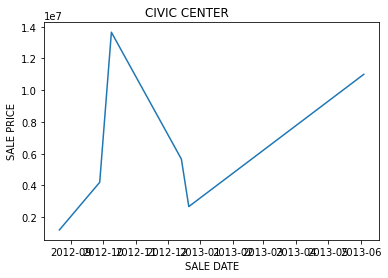

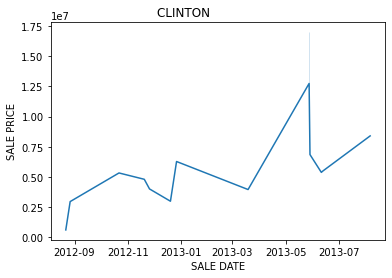

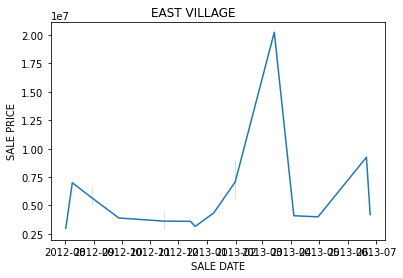

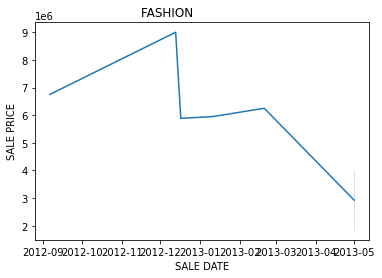

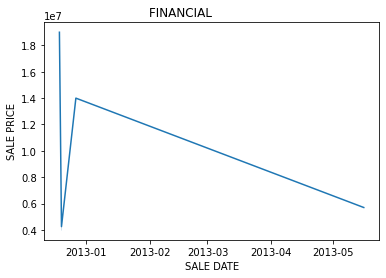

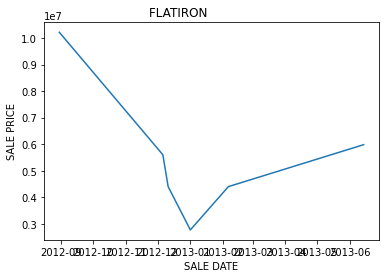

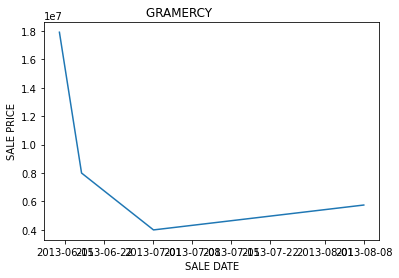

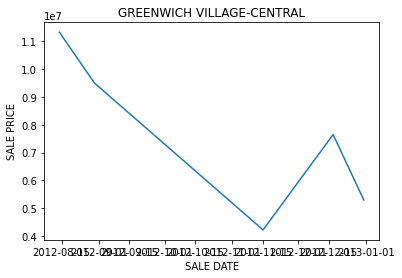

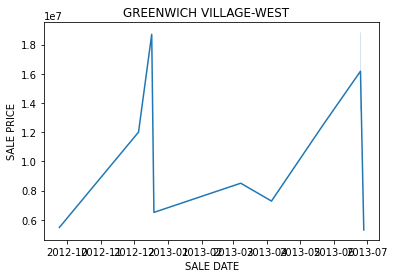

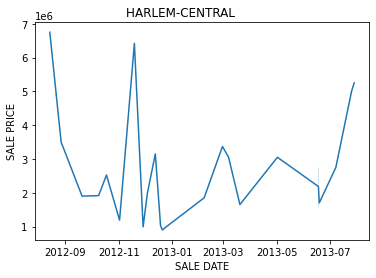

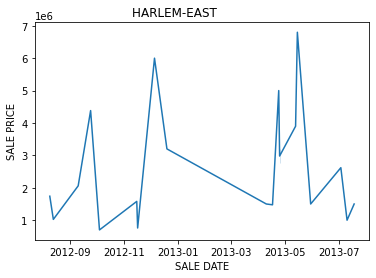

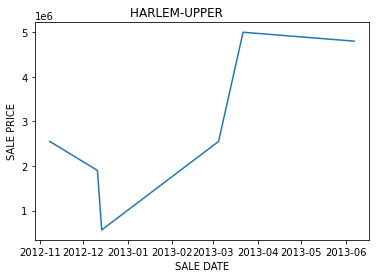

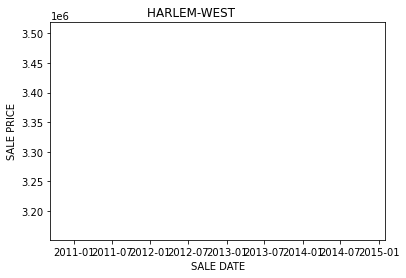

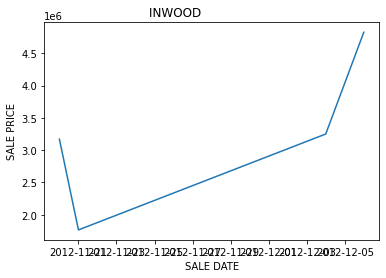

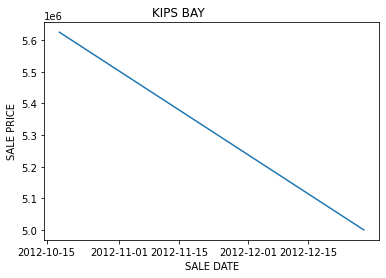

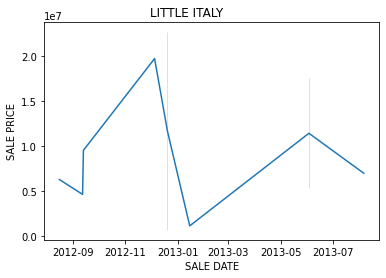

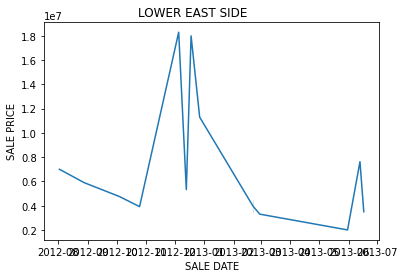

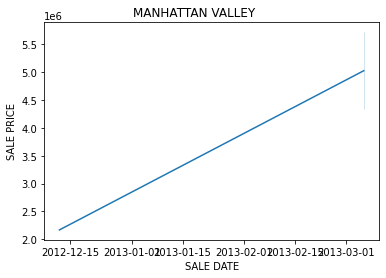

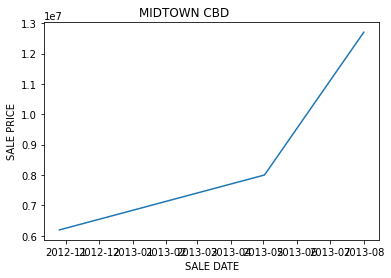

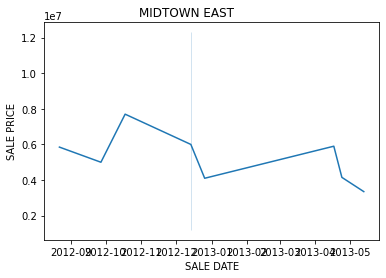

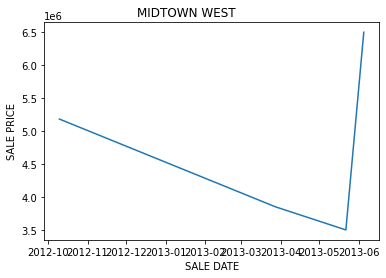

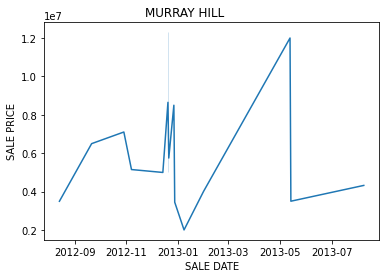

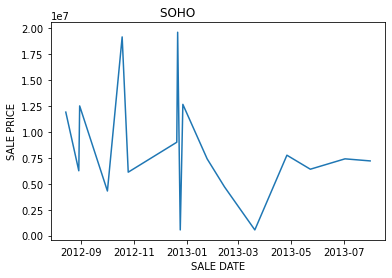

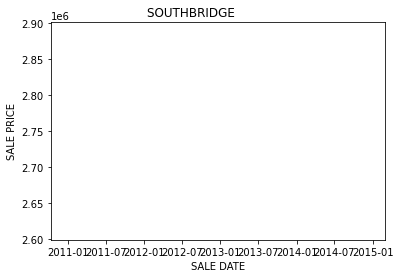

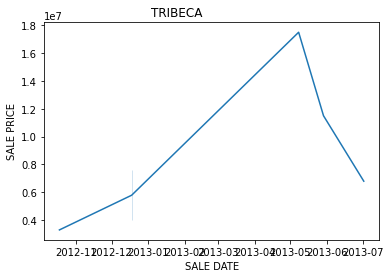

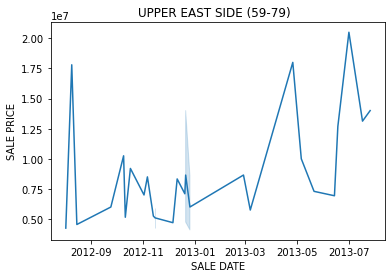

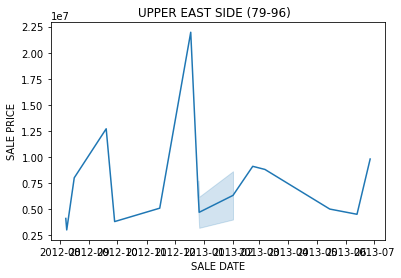

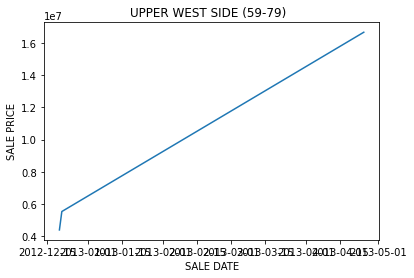

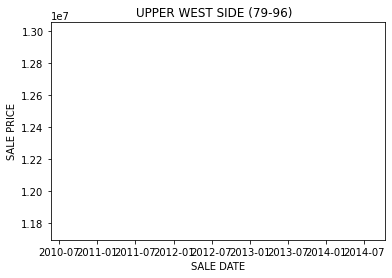

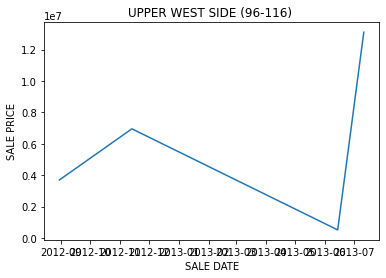

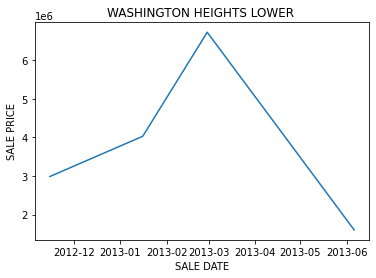

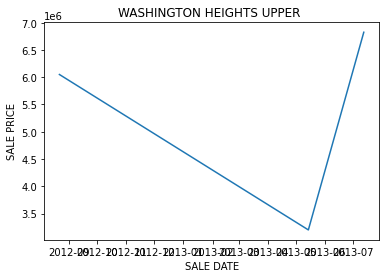

In [39]:
# create separate date/price line graph for each neighbourhood
def neighbourhood_price_date(df, neighbourhood):
    this_neighbourhood = df.query("NEIGHBORHOOD == " + "'" + neighbourhood + "'")
    sns.lineplot(data=this_neighbourhood, x='SALE DATE', y='SALE PRICE').set(title=neighbourhood)
    plt.show()


for i in neighbourhoods:
    neighbourhood_price_date(df, i)

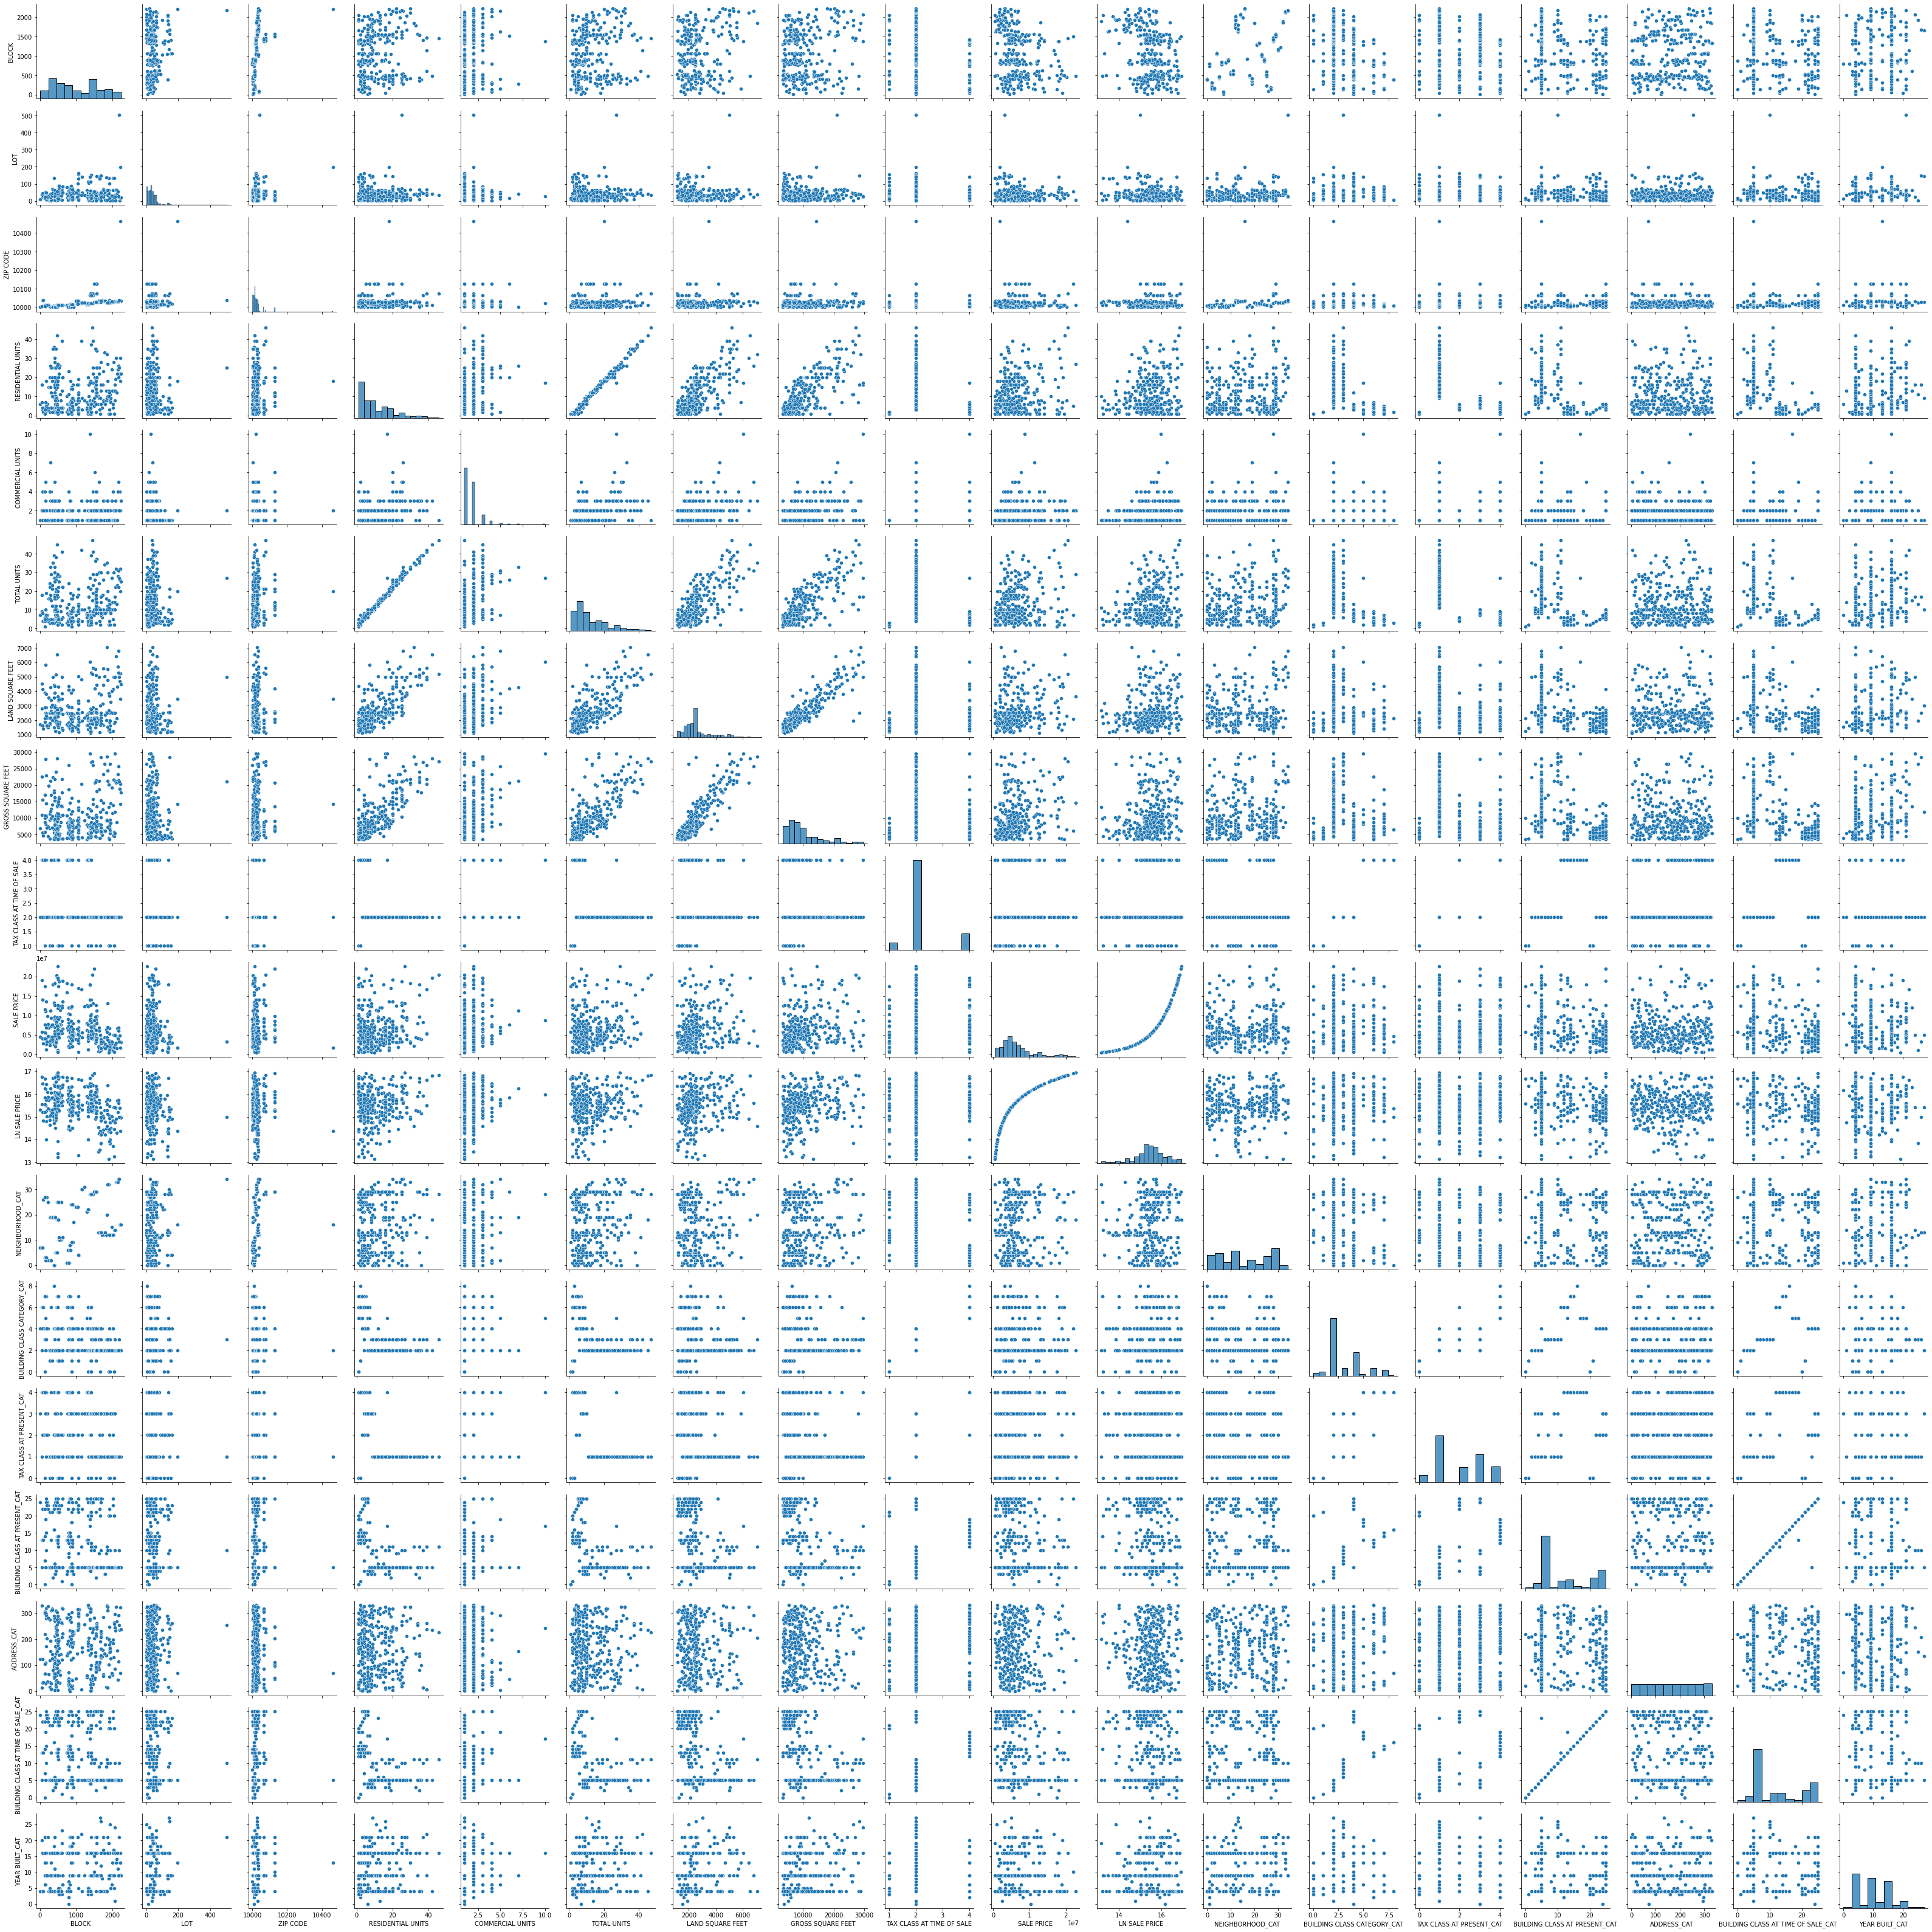

In [40]:
sns.pairplot(df) # generates matrix of scatterplots/histograms to show correlation

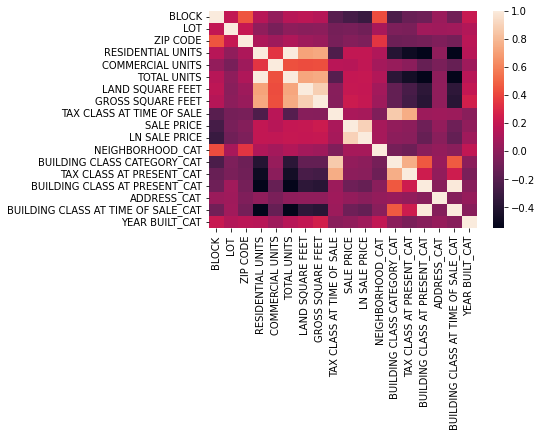

In [41]:
def correlation_matrix(df):
    corr = df.corr()
    sns.heatmap(corr)

correlation_matrix(df)

Model Building

In [42]:
# training a linear regression model
clf = LinearRegression()
feature_columns =["RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS","LAND SQUARE FEET", "GROSS SQUARE FEET","NEIGHBORHOOD_CAT", "YEAR BUILT_CAT"]

X = df_norm[feature_columns]
Y = df_norm['LN SALE PRICE']

In [43]:
# splitting train/test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

clf.fit(X_train, Y_train)

LinearRegression()

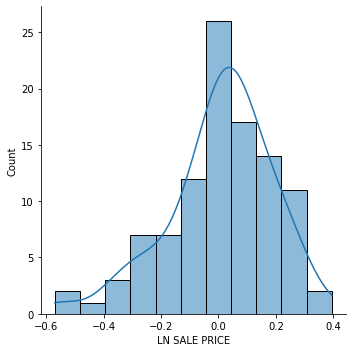

In [44]:
def model_hist(model, X, Y):
    pred_Y= model.predict(X)
    res = Y - pred_Y
    sns.displot(res, kde=True)
    plt.show()

model_hist(clf, X_test, Y_test)

In [45]:
def cross_val_mean(model, X, Y):
    return np.mean(cross_val_score(model, X, Y, cv=3, scoring='r2'))

score = cross_val_mean(clf, X_test, Y_test)
print(score)

0.05144114435172905
